# Analyzing Ford GoBike Trip Data (2018) 


## Table of Contents
- [Introduction](#intro)
- [Part I - Gathering Data](#gather)
- [Part II - Assessing Data](#assess)
- [Part III - Cleaning Data](#clean)
- [Part IV - Univariate Exploration](#univariate)
- [Part V - Bivariate Exploration](#bivariate)
- [Part VI - Multivariate Exploration](#multivariate)

<a id='intro'></a>
### Introduction

Ford GoBike is a regional public bicycle sharing system in the San Francisco Bay Area, California. Beginning operation in August 2013 as Bay Area Bike Share, the Ford GoBike system currently has over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system officially launched as Ford GoBike in a partnership with Ford Motor Company.
<br>
<br>Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

### Preliminary Wrangling

This document explores the Ford GoBike's trip data for public containing approximately 1,850,000 bike rides from 2018.

<a id='gather'></a>
## Part I - Gathering Data

In [15]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import glob
import os

%matplotlib inline

In [16]:
path= r'/Users/siddhant/Documents/Udacity/Projects/CommVisuals/CSV'

In [17]:
files = glob.glob(os.path.join(path, "*.csv"))
bike18 = pd.concat((pd.read_csv(f) for f in files), ignore_index = True)
bike18.to_csv('fordgo.csv', index = False)

In [64]:
bike18=pd.read_csv('fordgo.csv')

<a id='assess'></a>
## Part II - Assessing  Data

In [66]:
# Check first 5 records
bike18.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,598,2018-02-28 23:59:47.0970,2018-03-01 00:09:45.1870,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,-122.402570,1035,Subscriber,1988.0,Male,No
1,943,2018-02-28 23:21:16.4950,2018-02-28 23:36:59.9740,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,1673,Customer,1987.0,Male,No
2,18587,2018-02-28 18:20:55.1900,2018-02-28 23:30:42.9250,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3498,Customer,1986.0,Female,No
3,18558,2018-02-28 18:20:53.6210,2018-02-28 23:30:12.4500,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3129,Customer,1981.0,Male,No
4,885,2018-02-28 23:15:12.8580,2018-02-28 23:29:58.6080,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,-121.887931,1839,Subscriber,1976.0,Female,Yes


In [65]:
# Check 10 random records, to get an idea of the dataset
bike18.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
673313,341,2018-05-23 08:03:48.5490,2018-05-23 08:09:30.1160,196.0,Grand Ave at Perkins St,37.808894,-122.256460,182.0,19th Street BART Station,37.809013,-122.268247,2074,Subscriber,1984.0,Male,No
1291764,805,2018-08-21 18:04:27.9940,2018-08-21 18:17:53.3180,88.0,11th St at Bryant St,37.770030,-122.411726,34.0,Father Alfred E Boeddeker Park,37.783988,-122.412408,2429,Subscriber,1993.0,Female,No
1411423,215,2018-08-02 08:28:46.0790,2018-08-02 08:32:21.8740,212.0,Mosswood Park,37.824931,-122.260479,176.0,MacArthur BART Station,37.828410,-122.266315,869,Subscriber,1990.0,Female,No
1664492,768,2018-03-21 12:19:21.0060,2018-03-21 12:32:09.3420,45.0,5th St at Howard St,37.781752,-122.405127,112.0,Harrison St at 17th St,37.763847,-122.413004,2754,Subscriber,1965.0,Male,No
1584441,397,2018-10-05 19:56:20.8400,2018-10-05 20:02:58.2380,123.0,Folsom St at 19th St,37.760594,-122.414817,144.0,Precita Park,37.747300,-122.411403,1313,Subscriber,1979.0,Male,No
833507,983,2018-12-20 18:55:38.0800,2018-12-20 19:12:01.2320,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,56.0,Koshland Park,37.773414,-122.427317,4877,Subscriber,1987.0,Male,No
716130,1097,2018-05-15 17:59:09.6980,2018-05-15 18:17:27.6380,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,194.0,Lakeshore Ave at Trestle Glen Rd,37.811081,-122.243268,1389,Customer,NaN,NaN,No
1305874,9275,2018-08-19 12:02:27.6840,2018-08-19 14:37:03.6480,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,2614,Customer,1969.0,Male,No
859195,302,2018-12-17 06:41:54.2900,2018-12-17 06:46:56.7510,210.0,45th St at Manila,37.833294,-122.256224,176.0,MacArthur BART Station,37.828410,-122.266315,1889,Subscriber,1964.0,Male,No
1553396,753,2018-10-10 20:51:43.9140,2018-10-10 21:04:17.7180,310.0,San Fernando St at 4th St,37.335885,-121.885660,276.0,Julian St at The Alameda,37.332233,-121.912516,1625,Subscriber,1994.0,Male,Yes


In [67]:
# Basic Info
bike18.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
duration_sec               1863721 non-null int64
start_time                 1863721 non-null object
end_time                   1863721 non-null object
start_station_id           1851950 non-null float64
start_station_name         1851950 non-null object
start_station_latitude     1863721 non-null float64
start_station_longitude    1863721 non-null float64
end_station_id             1851950 non-null float64
end_station_name           1851950 non-null object
end_station_latitude       1863721 non-null float64
end_station_longitude      1863721 non-null float64
bike_id                    1863721 non-null int64
user_type                  1863721 non-null object
member_birth_year          1753003 non-null float64
member_gender              1753354 non-null object
bike_share_for_all_trip    1863721 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 227.5+ MB


In [22]:
# Checking for duplicates, None Exist.
bike18.duplicated().sum()

0

In [23]:
# View descriptive statistics of the dataframe
bike18.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.863721e+06,1.753003e+06
mean,8.573026e+02,1.196744e+02,3.776678e+01,-1.223492e+02,1.181730e+02,3.776690e+01,-1.223487e+02,2.296851e+03,1.983088e+03
std,2.370379e+03,1.003976e+02,1.057689e-01,1.654634e-01,1.004403e+02,1.056483e-01,1.650597e-01,1.287733e+03,1.044289e+01
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01,1.881000e+03
25%,3.500000e+02,3.300000e+01,3.777106e+01,-1.224114e+02,3.000000e+01,3.777106e+01,-1.224094e+02,1.225000e+03,1.978000e+03
50%,5.560000e+02,8.900000e+01,3.778107e+01,-1.223974e+02,8.800000e+01,3.778127e+01,-1.223971e+02,2.338000e+03,1.985000e+03
75%,8.720000e+02,1.860000e+02,3.779625e+01,-1.222865e+02,1.830000e+02,3.779728e+01,-1.222894e+02,3.333000e+03,1.991000e+03
max,8.636600e+04,3.810000e+02,4.551000e+01,-7.357000e+01,3.810000e+02,4.551000e+01,-7.357000e+01,6.234000e+03,2.000000e+03


<a id='clean'></a>
## Part III - Cleaning Data

In [24]:
# Create copies of original DataFrames
bike18_clean = bike18.copy()

**Define**
 * start time and end time are objects not a timestamps
 * user type, gender and bike_share_for_all_trip can be set to category
 * bike id, start_station_id, end_station_id can be set to object

**Code**

In [25]:
# set dates to timestamps
bike18_clean.start_time = pd.to_datetime(bike18_clean.start_time)
bike18_clean.end_time = pd.to_datetime(bike18_clean.end_time)

In [26]:
# set user type, gender and bike_share_for_all_trip to category
bike18_clean.user_type = bike18_clean.user_type.astype('category')
bike18_clean.member_gender = bike18_clean.member_gender.astype('category')
bike18_clean.bike_share_for_all_trip = bike18_clean.bike_share_for_all_trip.astype('category')

In [27]:
# set bike id, start_station_id, end_station_id to object
bike18_clean.bike_id = bike18_clean.bike_id.astype(str)
bike18_clean.start_station_id = bike18_clean.bike_id.astype(str)
bike18_clean.end_station_id = bike18_clean.bike_id.astype(str)

**Test**

In [63]:
bike18_clean.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1708250 entries, 0 to 1863720
Data columns (total 22 columns):
duration_sec               1708250 non-null int64
start_time                 1708250 non-null datetime64[ns]
end_time                   1708250 non-null datetime64[ns]
start_station_id           1708250 non-null object
start_station_name         1696859 non-null object
start_station_latitude     1708250 non-null float64
start_station_longitude    1708250 non-null float64
end_station_id             1708250 non-null object
end_station_name           1696859 non-null object
end_station_latitude       1708250 non-null float64
end_station_longitude      1708250 non-null float64
bike_id                    1708250 non-null object
user_type                  1708250 non-null category
member_birth_year          1708250 non-null int64
member_gender              1708250 non-null category
bike_share_for_all_trip    1708250 non-null category
member_age                 1708250 non-null int

**Define**
* Age of customers (2019- member_birth_year)

**Code**

In [29]:
# substract the birth year from the current year
bike18_clean['member_age'] = 2019-bike18_clean['member_birth_year']

**Test**

In [30]:
bike18_clean.head(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
0,598,2018-02-28 23:59:47.097,2018-03-01 00:09:45.187,1035,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,1035,Rhode Island St at 17th St,37.764478,-122.402570,1035,Subscriber,1988.0,Male,No,31.0
1,943,2018-02-28 23:21:16.495,2018-02-28 23:36:59.974,1673,The Embarcadero at Sansome St,37.804770,-122.403234,1673,Union Square (Powell St at Post St),37.788300,-122.408531,1673,Customer,1987.0,Male,No,32.0
2,18587,2018-02-28 18:20:55.190,2018-02-28 23:30:42.925,3498,4th St at Mission Bay Blvd S,37.770407,-122.391198,3498,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3498,Customer,1986.0,Female,No,33.0
3,18558,2018-02-28 18:20:53.621,2018-02-28 23:30:12.450,3129,4th St at Mission Bay Blvd S,37.770407,-122.391198,3129,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3129,Customer,1981.0,Male,No,38.0
4,885,2018-02-28 23:15:12.858,2018-02-28 23:29:58.608,1839,San Pedro Square,37.336802,-121.894090,1839,Locust St at Grant St,37.322980,-121.887931,1839,Subscriber,1976.0,Female,Yes,43.0
5,921,2018-02-28 23:14:19.170,2018-02-28 23:29:40.437,2656,San Jose Diridon Station,37.329732,-121.901782,2656,Mission St at 1st St,37.350964,-121.902016,2656,Customer,1997.0,Male,No,22.0
6,277,2018-02-28 23:21:49.274,2018-02-28 23:26:27.222,1616,San Salvador St at 1st St,37.330165,-121.885831,1616,San Fernando St at 4th St,37.335885,-121.885660,1616,Subscriber,1957.0,Female,No,62.0
7,285,2018-02-28 23:21:19.631,2018-02-28 23:26:05.405,144,Snow Park,37.807813,-122.264496,144,Grand Ave at Perkins St,37.808894,-122.256460,144,Subscriber,1990.0,Female,No,29.0
8,363,2018-02-28 23:19:18.606,2018-02-28 23:25:22.274,3351,MacArthur BART Station,37.828410,-122.266315,3351,Genoa St at 55th St,37.839649,-122.271756,3351,Subscriber,1975.0,Male,No,44.0
9,226,2018-02-28 23:15:20.033,2018-02-28 23:19:06.620,1699,William St at 10th St,37.332794,-121.875926,1699,5th St at San Salvador St,37.332039,-121.881766,1699,Subscriber,1996.0,Male,Yes,23.0


**Define**
<br>Dividing date and time into different columns for easier analysis later

**Code**

In [31]:
# extract start time month name
bike18_clean['start_time_month_name']=bike18_clean['start_time'].dt.strftime('%B')

In [32]:
# extract start time month number
bike18_clean['start_time_month']=bike18_clean['start_time'].dt.month.astype(int)

In [33]:
# extract start time weekdays
bike18_clean['start_time_weekday']=bike18_clean['start_time'].dt.strftime('%a')

In [34]:
# extract start time day
bike18_clean['start_time_day']=bike18_clean['start_time'].dt.day.astype(int)

In [35]:
# extract start time hour
bike18_clean['start_time_hour']=bike18_clean['start_time'].dt.hour

**Test**

In [36]:
bike18_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_time_month_name,start_time_month,start_time_weekday,start_time_day,start_time_hour
0,598,2018-02-28 23:59:47.097,2018-03-01 00:09:45.187,1035,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,1035,Rhode Island St at 17th St,37.764478,...,Subscriber,1988.0,Male,No,31.0,February,2,Wed,28,23
1,943,2018-02-28 23:21:16.495,2018-02-28 23:36:59.974,1673,The Embarcadero at Sansome St,37.804770,-122.403234,1673,Union Square (Powell St at Post St),37.788300,...,Customer,1987.0,Male,No,32.0,February,2,Wed,28,23
2,18587,2018-02-28 18:20:55.190,2018-02-28 23:30:42.925,3498,4th St at Mission Bay Blvd S,37.770407,-122.391198,3498,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,Customer,1986.0,Female,No,33.0,February,2,Wed,28,18
3,18558,2018-02-28 18:20:53.621,2018-02-28 23:30:12.450,3129,4th St at Mission Bay Blvd S,37.770407,-122.391198,3129,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,Customer,1981.0,Male,No,38.0,February,2,Wed,28,18
4,885,2018-02-28 23:15:12.858,2018-02-28 23:29:58.608,1839,San Pedro Square,37.336802,-121.894090,1839,Locust St at Grant St,37.322980,...,Subscriber,1976.0,Female,Yes,43.0,February,2,Wed,28,23


In [73]:
bike18_clean.info( null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1708250 entries, 0 to 1863720
Data columns (total 22 columns):
duration_sec               1708250 non-null int64
start_time                 1708250 non-null datetime64[ns]
end_time                   1708250 non-null datetime64[ns]
start_station_id           1708250 non-null object
start_station_name         1696859 non-null object
start_station_latitude     1708250 non-null float64
start_station_longitude    1708250 non-null float64
end_station_id             1708250 non-null object
end_station_name           1696859 non-null object
end_station_latitude       1708250 non-null float64
end_station_longitude      1708250 non-null float64
bike_id                    1708250 non-null object
user_type                  1708250 non-null category
member_birth_year          1708250 non-null int64
member_gender              1708250 non-null category
bike_share_for_all_trip    1708250 non-null category
member_age                 1708250 non-null int

In [39]:
bike18_clean.member_age.mean()

35.91203780027758

In [74]:
bike18_clean.member_age.describe()

count    1.708250e+06
mean     3.509174e+01
std      9.114289e+00
min      1.900000e+01
25%      2.800000e+01
50%      3.300000e+01
75%      4.000000e+01
max      6.000000e+01
Name: member_age, dtype: float64

**Define**
<br>Remove age outliers. Customers below the age of 60 will be considered.

**Code**

In [41]:
# Keep records below 60, it automatically removes null values
bike18_clean = bike18_clean.query('member_age <=60')

In [42]:
# change age and birth year to integer
bike18_clean.member_age = bike18_clean.member_age.astype(int)
bike18_clean.member_birth_year = bike18_clean.member_birth_year.astype(int)

**Test**

In [43]:
bike18_clean.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,member_age,start_time_month,start_time_day,start_time_hour
count,1.708250e+06,1.708250e+06,1.708250e+06,1.708250e+06,1.708250e+06,1.708250e+06,1.708250e+06,1.708250e+06,1.708250e+06,1.708250e+06
mean,7.770344e+02,3.776626e+01,-1.223483e+02,3.776635e+01,-1.223477e+02,1.983908e+03,3.509174e+01,6.985020e+00,1.572093e+01,1.351124e+01
std,1.985384e+03,1.068892e-01,1.695276e-01,1.067575e-01,1.691045e-01,9.114289e+00,9.114289e+00,3.112264e+00,8.782700e+00,4.769725e+00
min,6.100000e+01,3.726331e+01,-1.224737e+02,3.726331e+01,-1.224737e+02,1.959000e+03,1.900000e+01,1.000000e+00,1.000000e+00,0.000000e+00
25%,3.450000e+02,3.777041e+01,-1.224114e+02,3.777106e+01,-1.224094e+02,1.979000e+03,2.800000e+01,5.000000e+00,8.000000e+00,9.000000e+00
50%,5.430000e+02,3.778107e+01,-1.223971e+02,3.778107e+01,-1.223959e+02,1.986000e+03,3.300000e+01,7.000000e+00,1.600000e+01,1.400000e+01
75%,8.400000e+02,3.779581e+01,-1.222831e+02,3.779625e+01,-1.222876e+02,1.991000e+03,4.000000e+01,1.000000e+01,2.300000e+01,1.700000e+01
max,8.628100e+04,4.551000e+01,-7.357000e+01,4.551000e+01,-7.357000e+01,2.000000e+03,6.000000e+01,1.200000e+01,3.100000e+01,2.300000e+01


In [75]:
bike18_clean.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1708250 entries, 0 to 1863720
Data columns (total 22 columns):
duration_sec               1708250 non-null int64
start_time                 1708250 non-null datetime64[ns]
end_time                   1708250 non-null datetime64[ns]
start_station_id           1708250 non-null object
start_station_name         1696859 non-null object
start_station_latitude     1708250 non-null float64
start_station_longitude    1708250 non-null float64
end_station_id             1708250 non-null object
end_station_name           1696859 non-null object
end_station_latitude       1708250 non-null float64
end_station_longitude      1708250 non-null float64
bike_id                    1708250 non-null object
user_type                  1708250 non-null category
member_birth_year          1708250 non-null int64
member_gender              1708250 non-null category
bike_share_for_all_trip    1708250 non-null category
member_age                 1708250 non-null int

In [77]:
# save cleaned data 
bike18_clean.to_csv('clean_file.csv', index=False)

### What is the structure of your dataset?

Originally there were approx. 185,000 bike rides that happen in 2018 in the San Francisco Bay Area. The dataset contained features about:
 * trip duration
 * stations: start/end station
 * anonymized customer data: Gender, Age
 * Bike info

Some columns were created to increase the legibility of the data and generate better insights : 
 * rental time: month, day, hour of the day, weekday (both for start and end date)
 * customer: age

### What is/are the main feature(s) of interest in your dataset?

The main feature of interest will be the volume of bike rides across different times during the year and the distribution within the consumer base ie. Subscriber or casual customer.
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Consumer related data such as Age, Gender, Start Time and Date will be used majorly to determine area of interests.
<a id='univariate'></a>
## Part IV - Univariate Exploration

The way trips are distributed across : 
* Months
* Weekdays
* Hours 

This will give us an idea of overall usage patterns for the bike rental service.

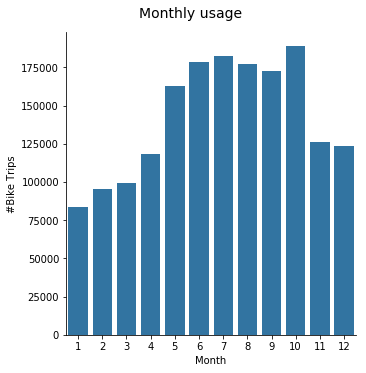

In [92]:
# monthly usege of the bike sharing system
g = sns.catplot(data=bike18_clean, x='start_time_month', kind='count', color = base_color)
g.set_axis_labels("Month", "#Bike Trips")
g.fig.suptitle('Monthly usage', y=1.03, fontsize=14);

The usage of the service decreases in towards the end of the year, mainly due to cold weather whereas usage increases during the spring and peaks around the Fall in October.

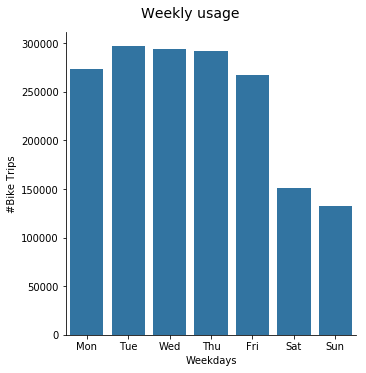

In [93]:
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.catplot(data=bike18_clean, x='start_time_weekday', kind='count', color = base_color, order = weekday)
g.set_axis_labels("Weekdays", "#Bike Trips")
g.fig.suptitle('Weekly usage', y=1.03, fontsize=14);

The service is used the least during the weekend which signifies people using it mainly for daily commute rather than leisurely activities.

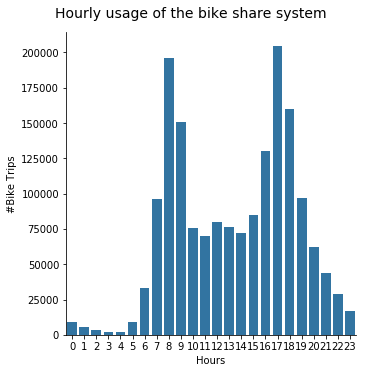

In [94]:
g = sns.catplot(data=bike18_clean, x='start_time_hour', kind='count', color = base_color)
g.set_axis_labels("Hours", "#Bike Trips")
g.fig.suptitle('Hourly usage of the bike share system', y=1.03, fontsize=14);

The morning and evening time rush hours are the most common among users. 

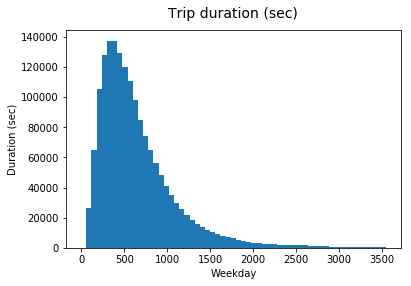

In [95]:
# code for the (histogram) duration (sec) distribution per user type

bin_edges = np.arange(0, 3600,60) # range set for 60 min

plt.hist(data = bike18_clean, x = 'duration_sec', bins = bin_edges)

plt.title("Trip duration (sec)", y=1.03, fontsize=14)
plt.xlabel('Weekday')
plt.ylabel('Duration (sec)');

Looking at the histogram, we can see that trip durations are no longer than 30 min and more commonly upto 15 mins.

The way the system is used: as is looks like people use the system for commuting, they trips are usually short in time probably due to the closeness of their homes to workplace/school.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There was one unusal points for the duration (sec), which in some cases lasted more than 24h. For the histogram I set the max range to 3600 sec = 60 min.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There was one unusal distribution for the member birth year, which in some cases was dated before 1900. Since 95% of the members are between 17 and 57 years, I removed users older than 60.


<a id='bivariate'></a>
## Part V - Bivariate Exploration

In this section I will further explore the dataset by adding the customer type to the analysis.

In [50]:
# calculating % split for the user type
customer = bike18_clean.query('user_type == "Customer"')['bike_id'].count()
subscriber = bike18_clean.query('user_type == "Subscriber"')['bike_id'].count()

customer_proportion = customer / bike18_clean['bike_id'].count()
subscriber_proportion = subscriber / bike18_clean['bike_id'].count()

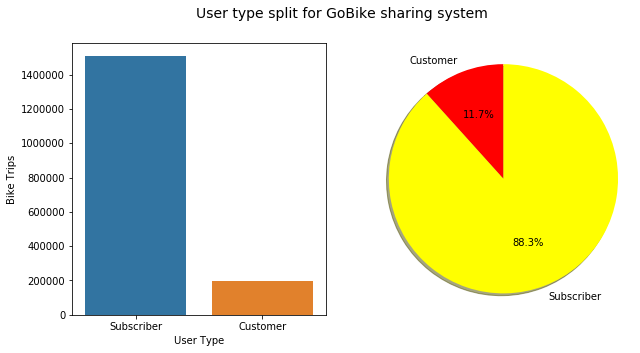

In [101]:
plt.figure(figsize = [10, 5])

# code for the bar chart
plt.subplot(1, 2, 1)

g = sns.countplot(data=bike18_clean, x="user_type", order=bike18_clean.user_type.value_counts().index)
g.set_xlabel('User Type')
g.set_ylabel('Bike Trips')

# code for the pie chart
plt.subplot(1, 2, 2)

labels = ['Customer', 'Subscriber']
sizes = [customer_proportion, subscriber_proportion]
colors = ['red', 'yellow']

plt.pie(sizes, labels=labels, colors = colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

plt.suptitle('User type split for GoBike sharing system', fontsize=14);

The bike sharing system is mainly used by subscribers (88%) than ocassional riders (12%).
<br>
<br>Next I am going to explore the renting trends per each user type.

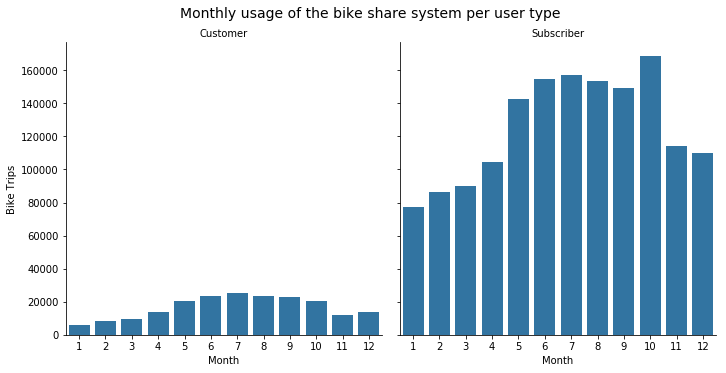

In [105]:
# monthly usege of the bike sharing system per user type
g = sns.catplot(data=bike18_clean, x='start_time_month', col="user_type", kind='count',
            color = base_color)
g.set_axis_labels("Month", "Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Monthly usage of the bike share system per user type', y=1.03, fontsize=14);

Winter months are the worst for the bike sharing system for both groups what can be determined by the harsher weather.
<br>
<br>For **Customers,** the bike renting is high in demand around summertime, reaching its peak in July. Customers are most probably occasional reiders or tourist coming to visit the Bay Area. For **Subscribers,** the highest demand is from May till October, reaching it's peak in October. 

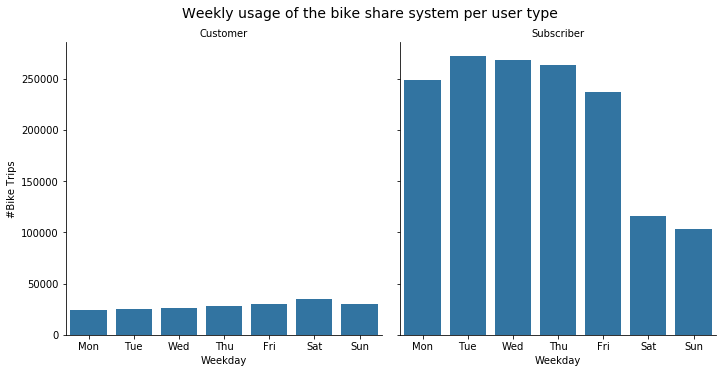

In [103]:
# weekday usege of the bike sharing system per user type

weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.catplot(data=bike18_clean, x='start_time_weekday', col="user_type", kind='count',
            color = base_color, order = weekday)
g.set_axis_labels("Weekday", "#Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Weekly usage of the bike share system per user type', y=1.03, fontsize=14);

There is a different trend on which days customers and subscribers rent bikes. As mentioned above **customers** are most probably occasional riders and tourist who use the bike sharing system on holiday or weekend trips. On the other hand, **subscribers** are most probably daily work/school commuters who use the system within a week.
<br>
<br>Next, I am going to check when within a day bikes are high in demand.

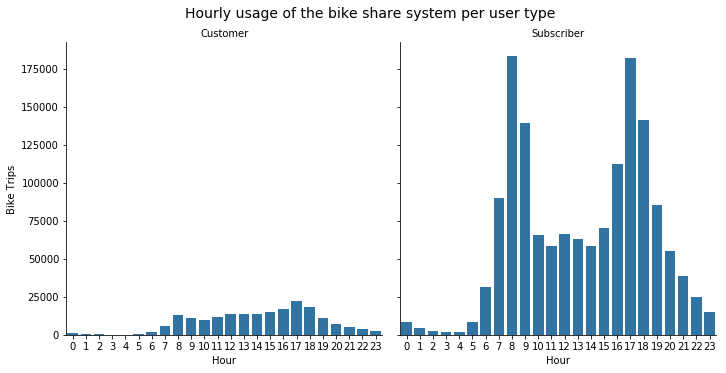

In [104]:
# hourly usege of the bike sharing system per user type

g = sns.catplot(data=bike18_clean, x='start_time_hour', col="user_type", kind='count',
            color = base_color)
g.set_axis_labels("Hour", "Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Hourly usage of the bike share system per user type', y=1.03, fontsize=14);

There is also a different trend of when during the day bikes are rented most often. **Customers** use bikes mainly between 8 am - 7 pm, reaching the renting peak around 5pm. **Subscribers** on the other side use the system at around 8-9am and 5-6pm when they go and come back from work.
<br>
<br>Next, I am going to check how the trip duration varies between customers and subscribers.

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


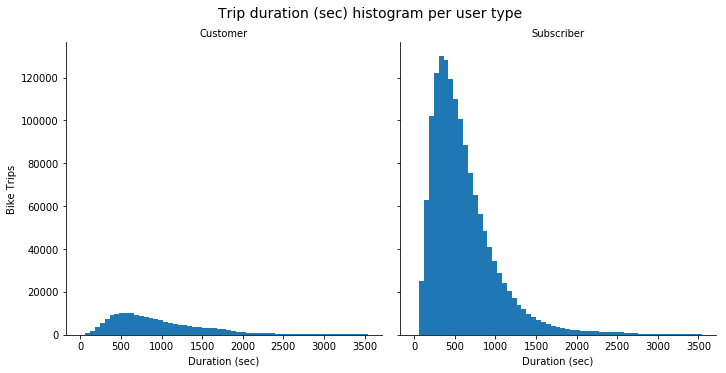

In [100]:
# code for the (histogram) duration (sec) distribution per user type

g = sns.FacetGrid(bike18_clean, col="user_type", margin_titles=True, size=5)
bin_edges = np.arange(0, 3600,60)
g.map(plt.hist, "duration_sec", color=base_color, bins=bin_edges)
g.set_axis_labels("Duration (sec)", "Bike Trips")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('Trip duration (sec) histogram per user type', y=1.03, fontsize=14);

Looking at both charts (histograms and box plots), we can see that trip durations are longer for customers (9 to 23 minutes) than for subscribers (7 to 13 minutes). This can probably be explained by the fact that subscribers are mainly commuters who take short trips to work/school rather than longer trips around the Bay Area.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Adding the user type to the analysis depicted different usage behaviours between customers and subscribers. As mentioned above **customers** are casual riders, most probably tourists who rent bikes mainly in summertime (the peak in July), more often during weekends than weekdays and they rent bikes more often within the day rather than around commute hours (8-9am and 5-6pm). **Subscribers** are daily commuters, who also use the system around summertime, May-October (with the peak in October). They rent bikes more often during weekdays than weekends and mainly around the time they go and go back from work or school (8-9am and 5-6pm).

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There is a difference in the trip duration between customers and subscribers. **Customers** trips are usually longer than for subscribers, most probably due to the fact they prefer bike rides around weekends in summertime, what encourages longer trips around the area. **Subscribers** on the other hand use the system mainly for commute purposes so they rather prefer quick rides to and from work/school.

<a id='multivariate'></a>
## Part VI - Multivariate Exploration

In this section I will further explore the dataset by adding gender to the customer type and check the hourly distribution of bike rides during weekdays for customers and subscribers.

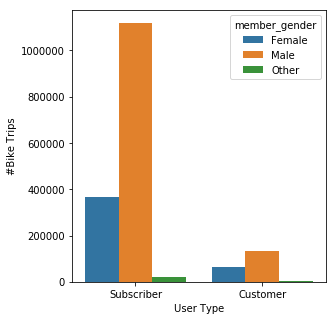

In [57]:
plt.figure(figsize = [10, 5])

# code for the bar chart
plt.subplot(1, 2, 1)

g = sns.countplot(data=bike18_clean, x="user_type", hue="member_gender", order=bike18_clean.user_type.value_counts().index)
g.set_xlabel('User Type')
g.set_ylabel('#Bike Trips');

In general, males are using the system more often than females and others (the registration system allows you to choose 'Other' as a gender). However, the ratio is much smaller between males and females for **customers** (more ore less 2:1) than for **subscribers** (3:1).
<br>
<br>Let's explore if gender affects the way the bike system is used within a year, weekdays and hours of the day.

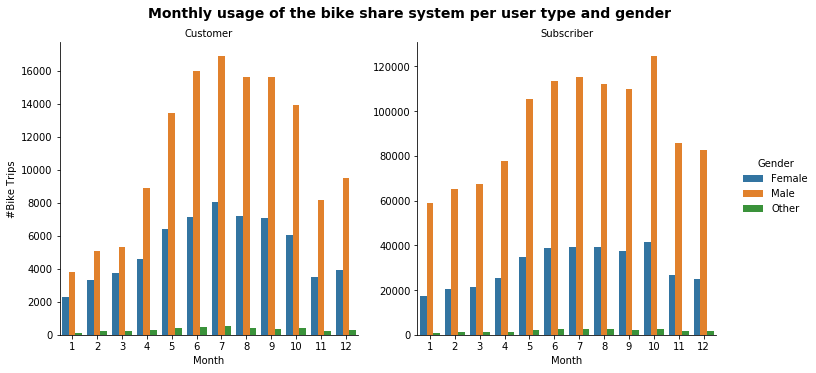

In [58]:
# monthly usege of the bike sharing system per user type and gender

g = sns.catplot(data=bike18_clean, x='start_time_month', col="user_type", hue="member_gender", kind='count', sharey = False)
g.set_axis_labels("Month", "#Bike Trips")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Monthly usage of the bike share system per user type and gender', y=1.03, fontsize=14, fontweight='semibold');

The trend is very similar for males and females: for **customers,** the highest demand is around summertime, reaching its peak in July; for **subscribers,** the highest demand is from May till October, reaching it's peak in October. Suprisingly, for **customers** there are quite a lot of females using the system between January and March in comparison to males - the ratio is much smaller than for the rest of the year.

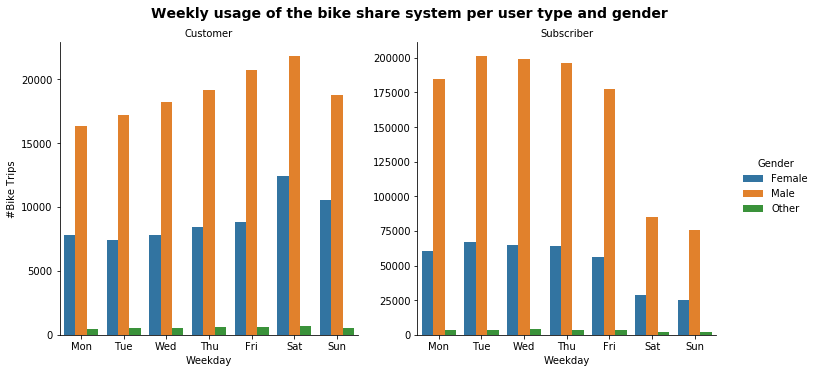

In [107]:
# weekday usege of the bike sharing system per user type and gender

weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.catplot(data=bike18_clean, x='start_time_weekday', col="user_type", hue='member_gender', kind='count', sharey = False,
                order = weekday)
g.set_axis_labels("Weekday", "#Bike Trips")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Weekly usage of the bike share system per user type and gender', y=1.03, fontsize=14, fontweight='semibold');

As in the previous section, the trend is very similar for males and females: **customers** use the system more often during weekends than within a week (although the jump in bike used on weekends is much higher for females than for males); **subscribers** use the system mainly within a week.

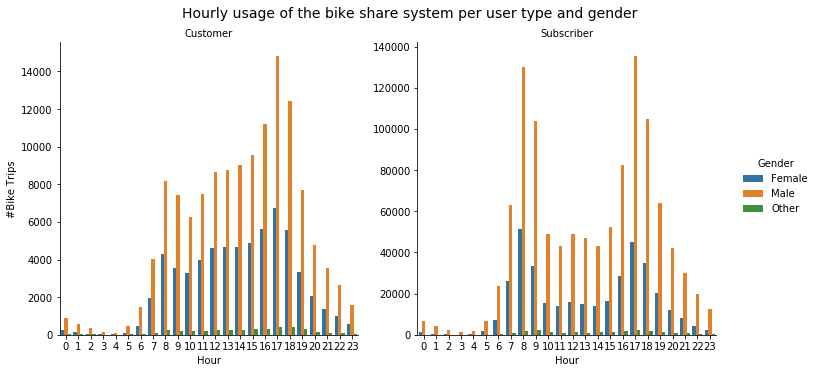

In [108]:
# hourly usege of the bike sharing system per user type and gender

g = sns.catplot(data=bike18_clean, x='start_time_hour', col="user_type", hue='member_gender', kind='count', sharey = False)
g.set_axis_labels("Hour", "#Bike Trips")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Hourly usage of the bike share system per user type and gender', y=1.03, fontsize=14);

During the day, both males and females use the system the same way: **customers** use bikes mainly between 8 am - 7 pm; **subscribers** on the other side use the system at around 8-9am and 5-6pm when they go and come back from work.

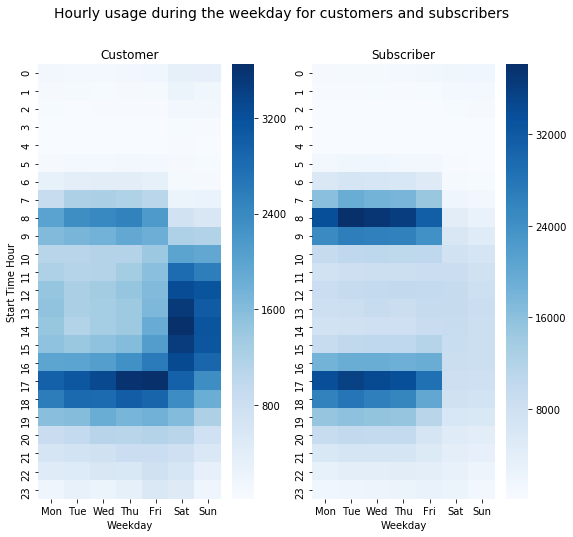

In [110]:
# Setting the weekday order
bike18_clean['start_time_weekday'] = pd.Categorical(bike18_clean['start_time_weekday'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)
plt.figure(figsize=(9,8))
plt.suptitle('Hourly usage during the weekday for customers and subscribers', fontsize=14)

# heatmap for customers
plt.subplot(1, 2, 1)
bike18_customer = bike18_clean.query('user_type == "Customer"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
bike18_customer = bike18_customer.pivot("start_time_hour", "start_time_weekday", "bike_id")
sns.heatmap(bike18_customer, cmap="Blues")

plt.title("Customer", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour')

# heatmap for subscribers
plt.subplot(1, 2, 2)
bike18_subscriber = bike18_clean.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
bike18_subscriber = bike18_subscriber.pivot("start_time_hour", "start_time_weekday", "bike_id")
sns.heatmap(bike18_subscriber, cmap="Blues")

plt.title("Subscriber", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('');

The plot perfectly summarizes in one place the diffrent trends for customers and subscribers I was writing up before.
<br>
#### Customers use the bike sharing system more often on weekends:
 * weekdays: most bike rides hapen around 8-9am and 5-6pm with the peak on Fridays around 5pm
 * weekends: most bike rides happen between 10am - 8pm with the peak on Saturdays around 2pm

#### Subscribers use the bike sharing system mainly on weekdays:
 * weekdays: most bike rides hapen around 8-9am and 5-6pm with the peak on Tuesdays around 8am
 * weekends: bikes are still rented but there is a significant drop in numbers of rented bikes throughout the entire weekends

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Plotting a heatmap of when bikes are high in demand throughout the day on each weekday shed a new light on the customers behaviour. Plotting #bike trips throughout the day and #bike trips within the weekdays separately gave the impression that the demand for bikes is quite high throughout the day with a peak around 5pm which is not entirely true. The trend within weekdays for customers follows (although customers are rather not early birds) the one for subscribers who rent bikes mainly around commute hours (8-9am and 5-6pm). For customers, as depicted in univariate explorations, most of the trips happen on weekends but mainly between 10am - 8pm with the peak on Saturdays around 2pm, what was previosly not visible.

### Were there any interesting or surprising interactions between features?

> I have also checked if there is a trend difference for genders for each user group. There are not much of the differences in trends but surprisingly there are quite a lot of females using the system between January and March in comparison to males - the ratio (male:female) is much smaller than for the rest of the year. Moreover females take longer trips (measured in time) than males and others.